<a href="https://colab.research.google.com/github/lalitha-sahitya/sarcasm-detection-nlp/blob/main/sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
od.download('https://www.kaggle.com/competitions/sarcasmdetect')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 1.74M/1.74M [00:00<00:00, 546MB/s]


Extracting archive ./sarcasmdetect/sarcasmdetect.zip to ./sarcasmdetect


In [4]:
os.listdir('sarcasmdetect')

['sample_submisson.csv', 'training_data.csv', 'test_data.csv']

In [5]:
data=pd.read_csv('/content/sarcasmdetect/training_data.csv')

In [6]:
data.head()

,ID,article_link,text,label
0,4724,https://www.huffingtonpost.com/entry/trump-rea...,"how trump really feels about queer people, exp...",0
1,26559,https://www.huffingtonpost.com/entry/egyptian-...,egyptian death sentence for soccer fans puts p...,0
2,24613,https://www.theonion.com/stripper-failing-scho...,stripper failing school she's working self thr...,1
3,9048,https://www.huffingtonpost.com/entry/ken-paxto...,texas attorney general ken paxton indicted,0
4,69,https://www.huffingtonpost.com/entry/debbie-di...,congresswoman fights for gun control because s...,0


In [7]:
test_data=pd.read_csv('/content/sarcasmdetect/test_data.csv')

In [8]:
test_data.head()

,ID,article_link,text
0,27927,https://www.huffingtonpost.com/entry/teacher-e...,states slow to shut down weak teacher educatio...
1,1660,https://www.theonion.com/drone-places-fresh-ki...,drone places fresh kill on steps of white house
2,96,https://www.theonion.com/report-majority-of-in...,report: majority of instances of people gettin...
3,6237,https://local.theonion.com/sole-remaining-lung...,"sole remaining lung filled with rich, satisfyi..."
4,6650,https://www.huffingtonpost.com/entry/the-gops-...,the gop's stockholm syndrome


In [9]:
data=data.drop(['ID','article_link'],axis=1)
test_data=test_data.drop(['ID','article_link'],axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22895 non-null  object
 1   label   22895 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 357.9+ KB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5724 entries, 0 to 5723
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5724 non-null   object
dtypes: object(1)
memory usage: 44.8+ KB


<Axes: xlabel='label', ylabel='count'>

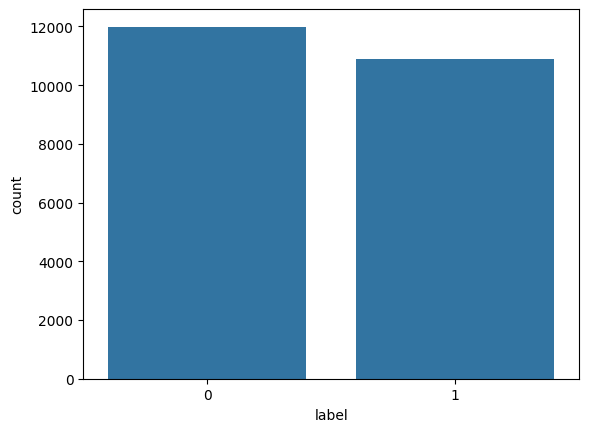

In [12]:
sns.countplot(x='label', data=data)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
tokens=Tokenizer(num_words=10000,oov_token='<oov>')

In [16]:
s=tokens.fit_on_texts(data['text'])

In [17]:
s_test=tokens.texts_to_sequences(test_data['text'])

In [18]:
s_data=tokens.texts_to_sequences(data['text'])

In [19]:
s_test[:10]

[[501, 2609, 2, 1211, 80, 2262, 411, 626, 3289],
 [1611, 1454, 4149, 507, 8, 1208, 3, 72, 70],
 [41,
  614,
  3,
  1,
  3,
  67,
  146,
  500,
  74,
  8,
  1216,
  1,
  1358,
  19,
  648,
  2,
  5574,
  1343,
  4103],
 [3719, 2601, 6112, 2005, 10, 1466, 6159, 2510],
 [4, 2856, 8776, 6959],
 [65, 257, 198],
 [8257, 6234, 1, 974, 9947, 5, 8898, 83, 1, 127],
 [41, 25, 787, 763, 3, 97, 32, 55, 25],
 [12, 5038, 8440, 602, 646, 2415, 42, 57, 2, 786, 1, 2490],
 [122, 3552, 252, 39, 24, 4587, 3145, 856, 3, 461, 6, 388, 839, 3, 114, 670]]

In [20]:
s_data[:10]

[[27, 13, 109, 638, 17, 781, 67, 4774, 5, 43, 1939],
 [4227, 125, 1939, 6, 1549, 335, 761, 1940, 3529, 7704, 2, 4, 782],
 [5440, 1861, 105, 533, 504, 150, 163],
 [476, 1941, 941, 3237, 7705, 3238],
 [5441, 3239, 6, 228, 386, 367, 120, 879, 557, 61, 68, 2, 228, 390],
 [7706, 4228, 9928, 9, 6333, 6334, 2, 1368, 7, 3836, 2172, 6335, 8, 1199, 912],
 [243, 1, 9, 1, 31, 913, 4, 3837, 2043],
 [195, 7, 1862, 3, 27, 679, 58, 13, 38, 2414, 1, 8, 145, 251],
 [7707, 3240, 5442, 15, 2988, 3530],
 [2590, 3, 57, 5, 880, 166, 942, 3, 27, 220, 182, 51, 914, 1942, 9929]]

In [21]:
s_test_padded=pad_sequences(s_test,maxlen=100,padding='post',truncating='post')
s_data_padded=pad_sequences(s_data,maxlen=100,padding='post',truncating='post')

In [22]:
x=s_data_padded
y=data['label']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train.shape

(18316, 100)

In [25]:
x_test.shape

(4579, 100)

In [26]:
y_train.shape

(18316,)

In [27]:
y_test.shape

(4579,)

In [28]:
import tensorflow as tf
import keras

In [29]:
y_train=tf.convert_to_tensor(y_train)
y_test=tf.convert_to_tensor(y_test)

In [30]:
model=keras.Sequential([
    keras.layers.Embedding(10000,16,input_length=100),
    keras.layers.Bidirectional(keras.layers.LSTM(20,return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(20)),
    keras.layers.Dense(2,activation='sigmoid')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 88s 141ms/step - accuracy: 0.7069 - loss: 0.5216 - val_accuracy: 0.8504 - val_loss: 0.3354
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 79s 136ms/step - accuracy: 0.9066 - loss: 0.2335 - val_accuracy: 0.8561 - val_loss: 0.3533
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 80s 133ms/step - accuracy: 0.9504 - loss: 0.1389 - val_accuracy: 0.8456 - val_loss: 0.3880
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.9702 - loss: 0.0924 - val_accuracy: 0.8439 - val_loss: 0.4741
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 83s 145ms/step - accuracy: 0.9820 - loss: 0.0545 - val_accuracy: 0.8443 - val_loss: 0.5785
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 136s 134ms/step - accuracy: 0.9898 - loss: 0.0339 - val_accuracy: 0.8399 - val_loss: 0.6038
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 75s 131ms/step - accuracy: 0.9926 - loss: 0.0221 - val_accuracy: 0.8395 - val_loss: 0.7038
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.9957 - loss: 

In [33]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved as model.pkl")

Model saved as model.pkl


In [38]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokens, f)

In [34]:
preds=model.predict(s_test_padded)

179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step


In [35]:
preds[0]

array([0.6176786, 0.4073646], dtype=float32)

In [36]:
preds=np.argmax(preds,axis=1)

In [37]:
preds

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
sub=pd.read_csv('/content/sarcasmdetect/sample_submisson.csv')
sub

,ID,label
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
5,5,0
6,6,1


In [ ]:
sub_df = pd.DataFrame({
    'ID': range(7,len(preds)),
    'label': preds[7:]
})
sub=pd.concat([sub,sub_df])

In [ ]:
sub

,ID,label
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
5712,5719,0
5713,5720,0
5714,5721,0
5715,5722,0


In [ ]:
len(sub)

5724

In [ ]:
sub.to_csv('sub.csv')